# CMPE 462 - Machine Learning Assignment 1
## Furkan Keskin - 2018400150
## Sinem Kocoglu - 2020400339

# Question 1

__(a)__ Decision boundary in the perceptron algorithm can be found by the following equation: <br> $\mathbf{w}^\intercal \mathbf{x} = 0 \Longrightarrow w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} = 0 \Longrightarrow x_{2} = -\dfrac{w_{1}}{w_{2}}x_{1} - \dfrac{w_{0}}{w_{2}}$ <br>
$\Longrightarrow a = -\dfrac{w_{1}}{w_{2}}$ and $b = -\dfrac{w_{0}}{w_{2}}$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

%matplotlib inline

# target function f
f = lambda x : -2*x + 3

l = -50   # low limit
h = 0     # high limit

# setting axis range for the target function f
x_axis, y_axis = [l, h], [f(l), f(h)]


def plot_target_function():
    plt.plot(x_axis, y_axis, color = 'black', label = 'target function')


def data_generation(data_size):
    np.random.seed(100)

    # x: input vector
    # y: output vector
    x1 = np.random.uniform(low = l, high = h, size=data_size)
    x2 = np.random.uniform(low = f(h), high = f(l), size=data_size)
    y = np.zeros(data_size)

    for i, (point_x1, point_x2) in enumerate(zip(x1, x2)):
        if point_x2 < f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'b', marker = 'o')
            y[i] = -1
        elif point_x2 > f(point_x1):
            plt.scatter(point_x1, point_x2, color = 'r', marker = 'x')
            y[i] = +1
        else:
            plt.scatter(point_x1, point_x2, color = 'black')
            
    return x1, x2, y

__(b)__ We chose $f(x) = -2x + 3 $ as our target function and uniformly generated the data points in the range of -50 and 0. If a data point is under the target function it is labeled as -1 (blue - round), if it is above the target function then it is labeled as +1 (red - cross).

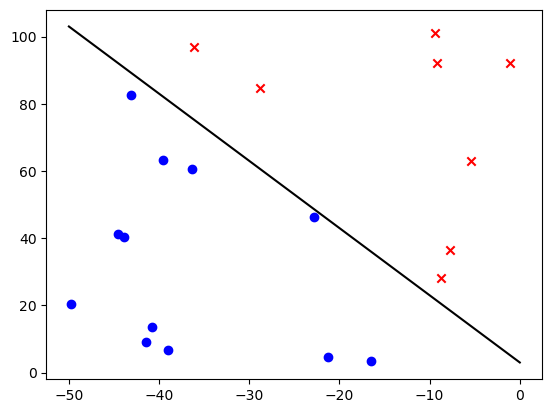

In [3]:
# target function and a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)

In [4]:
def perceptron_learning_algorithm(data_size, x1, x2, y):
    # initial parameters
    w = np.zeros(3)
    update_no = 0
    
    while True:
        misclassified = False
        for i in range(data_size):
            x = np.array([1, x1[i], x2[i]])
            if y[i]*(np.dot(w, x)) <= 0:
                w = w + y[i]*x
                misclassified = True
                break
            
        if misclassified == False:
            break
        
        update_no+=1
        
    
    g = lambda x : -w[1]*x/w[2] - w[0]/w[2]
    y_learned_axis = [g(l), g(h)]
    
    # plotting the predicted target function
    plt.plot(x_axis, y_learned_axis, color = 'green', label = 'learned function')
    print(f"Number of updates that the algorithm takes before converging: {update_no}")

__(c)__ Above we implemented the perceptron algorithm from scratch. It takes size of the data that will be classified, input feature vectors $x_{1}$, $x_{2}$ and the outputs $y$. Additionally, since the $x_{0}$ values of each input vector are 1, we prepended those values at the beginning of the input vectors in the algorithm. <br> <br>
In the plot below, black line represents the target function and green line represents the decision boundary that our perceptron algorithm has generated. <br> <br>
As it can clearly be seen they are quite close to each other. However, it is obvious that they are not quite the same.

Number of updates that the algorithm takes before converging: 3


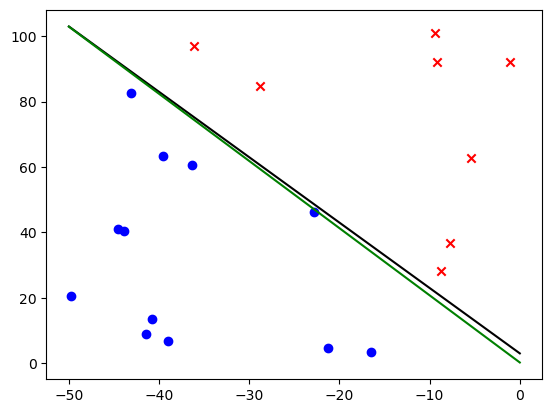

In [5]:
# perceptron learning algorithm with a data set of size 20
plot_target_function()
x1, x2, y = data_generation(20)
perceptron_learning_algorithm(20, x1, x2, y)

__(d)__ We repeated everything in (c) with the data size 1000 instead of 20. This time, our data points are placed more compactly due to the drastic increase in the data size. As this increases the convergence success of our algorithm, we see that the target function and the decision boundary become almost inseparable.  <br>

The reason for this phenomenon is that the data points we generated are placed so compactly that the slope of our decision boundary could take values in a very narrow interval. This made the decision boundary and the target function look very similar and significantly increased the convergence time.

Number of updates that the algorithm takes before converging: 19173


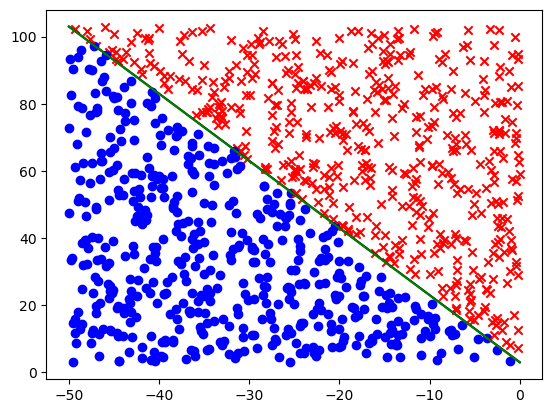

In [6]:
# perceptron learning algorithm with a data set of size 1000
plot_target_function()
x1, x2, y = data_generation(1000)
perceptron_learning_algorithm(1000, x1, x2, y)

# Question 2

__(a)__ Below you can find the function to convert the images into grayscaled and flattened vectors with the help of OpenCV library. Later we will use this function to convert the images in the _3dshapes_train_ and _3dshapes_test_. We also keep the 2d versions as well since we will use them to extract features later.

In [7]:
y_train = np.load("orientations_train.npy")

train_size = 10000
image_length = 4096
image_dim = 64

def vectorize_images(filename, data_size):
    # X for training and X_2d for feature extraction
    X = np.empty(shape=(data_size, image_length))
    X_2d = np.empty(shape=(data_size, image_dim, image_dim), dtype='uint8')

    for i in range(data_size):        
        img = cv.imread("{filename}/{i}.jpg".format(filename = filename, i = i), cv.IMREAD_GRAYSCALE)
        X[i] = img.flatten()
        X_2d[i] = img
        
    return X, X_2d

X_train, X_train_2d = vectorize_images("3dshapes_train" ,train_size)

__(b)__ In order to find the optimal weight vector coefficients, we set the gradient of the least square error function to 0. The closed-form solution we obtain is as follows: <br>

$ \mathbf{w}^* = {({X}^\intercal X)}^{-1}{X}^\intercal \mathbf{t} $ <br>

Below we implemented the function to calculate the optimal weights and used it to train the model. <br> <br>
To test our model we first generated our predictions using the formula: $ \hat{y} = Xw = X{({X}^\intercal X)}^{-1}{X}^\intercal \mathbf{t} $ and then compared it with the actual labels.

In [8]:
# computing the optimal parameters by minimizing the least squares error function
def linear_regression(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

w = linear_regression(X_train, y_train)

In [9]:
y_test = np.load("orientations_test.npy")

test_size = 1000

X_test, X_test_2d = vectorize_images("3dshapes_test" ,test_size)
y_prediction = X_test @ w

RMSE = math.sqrt(np.square(np.subtract(y_test, y_prediction)).mean()) 
print(f"Root Mean Square Error is: {RMSE}")

Root Mean Square Error is: 1.511688025740367e-06


__(c)__ Below you can find SIFT (Scale-invariant feature transform) algorithm implementation of ours with the help of OpenCV documents. It basically finds keypoints and descriptors for each of the images. We trained our model with stacking these descriptors and their corresponding labels. <br>
We chose SIFT as the feature extraction algorithm because as a result of our research we found that it is especially good at extracting features related to edges, corners, blobs, scale-invariant features and rotation-invariant features. Thus, we thought that it would make sense to use this algorithm to extract orientation related features.

In [10]:
# RESOURCES: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

def extract_features(X_2d, y, data_size):
    keypoints = np.empty(data_size, dtype=object)
    number_of_keypoints = 0

    # Initiate SIFT detector
    sift = cv.xfeatures2d.SIFT_create()

    for i in range(data_size):
        # find the keypoints
        kp = sift.detect(X_2d[i], None)
        keypoints[i] = kp
        number_of_keypoints += len(kp)

    X_sift = np.empty(shape = (number_of_keypoints, 128))
    y_sift = np.empty(number_of_keypoints)

    idx = 0
    for i in range(data_size):
        # find the descriptors
        kp, desc = sift.compute(X_2d[i], keypoints[i])

        if len(kp) != 0:
            for d in desc:
                X_sift[idx] = d
                y_sift[idx] = y[i]
                idx += 1
    
    return X_sift, y_sift

In [11]:
# extracting features for training
X_train_sift, y_train_sift = extract_features(X_train_2d, y_train, train_size)

# training the model with the extracted features
w_sift = linear_regression(X_train_sift, y_train_sift)

# extracting features from the test data 
X_test_sift, y_test_sift = extract_features(X_test_2d, y_test, test_size)

# making predictions using the w coming from the extracted data set
y_prediction_sift = X_test_sift @ w_sift

# calculating the RMSE
RMSE_sift = math.sqrt(np.square(np.subtract(y_test_sift, y_prediction_sift)).mean()) 
print(f"Root Mean Square Error with the extracted features is: {RMSE_sift}")

Root Mean Square Error with the extracted features is: 17.759797638538384


__(c)__ As it clearly can be seen, current result is much worse than the previous result. The main reason for this could be that we lose too much information in the feature extraction process, we don't extract the right features, or we do something wrong during implementation. 

# Question 3

__(a)__ To increase computational efficiency, we were asked to manipulate the pixel values of input images and extract intensity and symmetry features. <br>

Intensity is simply looking at the value of the elements of our image vector, and if it is greater than 0, it is counted as black pixel, and if it is less than 0, it is counted as white pixel. Accordingly, we took the number of black pixels as the intensity feature.  <br>

We defined the symmetry feature as the negative of the sum of the absolute values of the difference of the elements corresponding to the same position after making the given vector two-dimensional and taking its symmetry with respect to the y-axis. 

In [12]:
train_size = 1561
test_size = 424
image_length = 256

X_train = np.load("train_data.npy")
y_train = np.load("train_labels.npy")

X_test = np.load("test_data.npy")
y_test = np.load("test_labels.npy")


def extract_features(X, data_size):
    X_ext = np.zeros(shape=(data_size, 3))
    
    # setting the X[:, 0] = 1 in order to absorb the bias term w[0]
    X_ext[:, 0] = 1
    
    # extracting intensity (amount of black pixels)
    for i in range(data_size):
        black_pixels = 0
        for j in range(image_length):
            if X[i][j] > 0:
                black_pixels += 1
        
        X_ext[i][1] = black_pixels
    
    # extracting symmetry (negative of absolute difference between an image and its flipped versions)
    for i in range(data_size):
        asymmetry = 0
        for row in range(16):
            for col in range(8):
                asymmetry += abs(X[i][16*row+col] - X[i][16*row+15-col])
                
        X_ext[i][2] = -asymmetry
        
    
    return X_ext


In [13]:
X_train_ext = extract_features(X_train, train_size)
X_test_ext = extract_features(X_test, test_size)

In [14]:
def plot_features(X, y, data_size):
    for i in range(data_size):
        # digit 1
        if y[i] == 1:
            plt.scatter(X[i][1], X[i][2], color = 'b', marker = 'o')
            
        # digit 5
        elif y[i] == -1:
            plt.scatter(X[i][1], X[i][2], color = 'r', marker = 'x')
        
    plt.xlabel("intensity")
    plt.ylabel("symmetry")

__(b)__ You can find the plots of the training and test data below. Blue data points correspond to digit 1 and red data points correspond to digit 5.

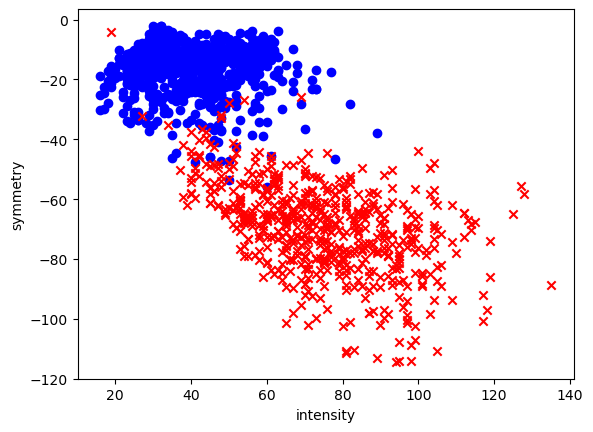

In [15]:
# plotting features of the extracted train data
# o: digit 1
# x: digit 5
plot_features(X_train_ext, y_train, train_size)

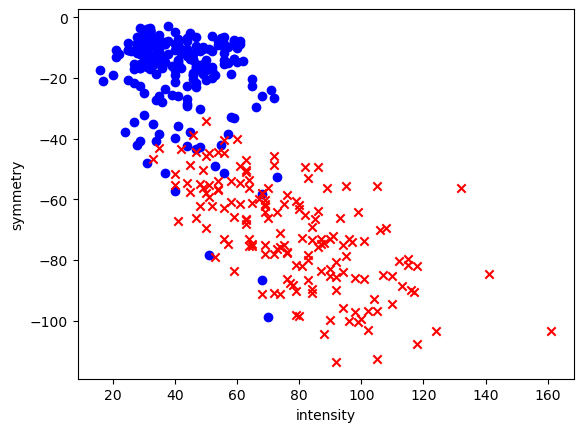

In [16]:
# plotting features of the extracted test data
# o: digit 1
# x: digit 5
plot_features(X_test_ext, y_test, test_size)

__(c)__ The logistic loss function is defined as $ E(\mathbf w) = \dfrac{1}{N} \displaystyle\sum_{i=1}^N \ln(1+e^{-y_{i}w^\intercal x_{i}}). $ Now, let's take the gradient. 

$ \nabla_{w} E(\mathbf w) = \nabla\dfrac{1}{N} \displaystyle\sum_{i=1}^N \ln(1+e^{-y_{i}w^\intercal x_{i}}) $

$= \dfrac{1}{N} \displaystyle\sum_{i=1}^N \nabla\ln(1+e^{-y_{i}w^\intercal x_{i}})$

$ = \dfrac{1}{N} \displaystyle\sum_{i=1}^N  \dfrac{-y_{i}x_{i} e^{-y_{i}w^\intercal x_{i}}}{1 + e^{-y_{i}w^\intercal x_{i}}} $

$ = \dfrac{1}{N} \displaystyle\sum_{i=1}^N -y_{i}x_{i} \sigma(-y_{i}w^\intercal x_{i})$


In our implementation, we used the version we derivated in the last step above.

In [17]:
def sigmoid(y, w, x):
    a = y * np.dot(w, x)
    s = 1 / (1 + math.exp(-a))
    return s


def gradient(y, w, X, data_size):
    gradient = 0
    for i in range(data_size):
        gradient -= y[i] * X[i] * sigmoid(-y[i], w, X[i])
        
    gradient /= data_size
    return gradient


def logistic_regression(y, X, data_size, feature_no, learning_rate, iterations):
    # w[0] is the bias term
    w = np.zeros(feature_no+1)
    
    for i in range(iterations):
        g = gradient(y, w, X, data_size)
        w = w - learning_rate * g
        
    return w

In [18]:
# applying logistic regression to find coefficients that will approximately minimize the error
w_ext = logistic_regression(y_train, X_train_ext, train_size, 2, 0.1, 5000)

print(f"Weight vector is: {w_ext}")

Weight vector is: [22.8462141  -0.0926886   0.40482195]


__(c)__ We trained our model using 0.1 learning rate and 5000 iterations. In the plot, it can be seen that the decision boundary separated the data almost perfectly. We derived the formula for the decision boundary as follows: <br>
$ \sigma (\mathbf w^\intercal \mathbf x) = \dfrac{1}{2} \Longrightarrow  \mathbf w^\intercal \mathbf x = 0 \Longrightarrow w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0 \Longrightarrow x_{2} = -\dfrac{w_{1}}{w_{2}}x_{1} - \dfrac{w_{0}}{w_{2}}$ <br>
Here $ x_{2} $ represents the symmetry and $ x_{1} $ represents the intensity.

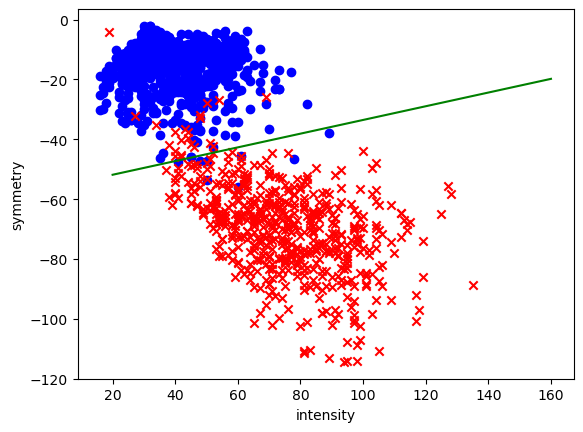

In [19]:
g = lambda x : -w_ext[1]*x/w_ext[2] - w_ext[0]/w_ext[2]
x_axis, y_axis = [20, 160], [g(20), g(160)]

# plotting features of the extracted train data with the separator
plot_features(X_train_ext, y_train, train_size)
plt.plot(x_axis, y_axis, color = 'green')
plt.show()

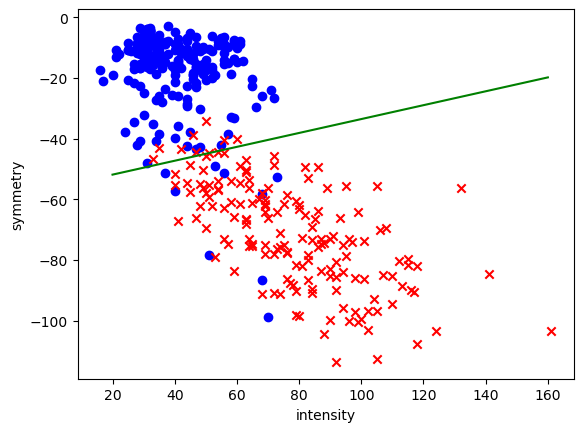

In [20]:
# plotting features of the extracted test data with the separator
plot_features(X_test_ext, y_test, test_size)
plt.plot(x_axis, y_axis, color = 'green')
plt.show()

In [21]:
def calculate_error(y, w, X, data_size):
    error = 0
    for i in range(data_size):
        s = y[i] * np.dot(w, X[i]) 
        error += np.log(1 + math.exp(-s))
    
    error /= data_size
    return error

def calculate_accuracy(y, w, X, data_size):
    correct = 0
    for i in range(data_size):
        if y[i] * np.dot(w, X[i]) > 0:
            correct += 1
    
    return 100 * correct / data_size
            
    

print(f"Train error is {calculate_error(y_train, w_ext, X_train_ext, train_size)}")
print(f"Test error is {calculate_error(y_test, w_ext, X_test_ext, test_size)}")

print(f"Train accuracy is % {calculate_accuracy(y_train, w_ext, X_train_ext, train_size)}")
print(f"Test accuracy is % {calculate_accuracy(y_test, w_ext, X_test_ext, test_size)}")
    

Train error is 0.07783669203816104
Test error is 0.2379474377060314
Train accuracy is % 98.0140935297886
Test accuracy is % 95.75471698113208


__(d)__ The logistic loss function with regularization is defined as $ E(\mathbf w) = \dfrac{1}{N} \displaystyle\sum_{i=1}^N \ln(1+e^{-y_{i}w^\intercal x_{i}} + \mathbf{\lambda w^\intercal w}). $ Now, let's take the gradient. 

$ \nabla_{w} E(\mathbf w) = \nabla\dfrac{1}{N} \displaystyle\sum_{i=1}^N \ln(1+e^{-y_{i}w^\intercal x_{i}}) + 2\mathbf{\lambda w} $

$= \dfrac{1}{N} \displaystyle\sum_{i=1}^N \nabla\ln(1+e^{-y_{i}w^\intercal x_{i}}) + 2\mathbf{\lambda w} $

$ = \dfrac{1}{N} \displaystyle\sum_{i=1}^N  \dfrac{-y_{i}x_{i} e^{-y_{i}w^\intercal x_{i}}}{1 + e^{-y_{i}w^\intercal x_{i}}} + 2\mathbf{\lambda w} $

$ = \dfrac{1}{N} \displaystyle\sum_{i=1}^N -y_{i}x_{i} \sigma(-y_{i}w^\intercal x_{i}) + 2\mathbf{\lambda w} $

In our implementation for the regularized gradient, we used the version we derivated in the last step above and updated the logistic regression with the regularization accordingly. 

In [22]:
def gradient_with_regularization(y, w, X, data_size, lmd):
    return gradient(y, w, X, data_size) + 2*lmd*w

def calculate_error_with_regularization(y, w, X, data_size, lmd):
    return calculate_error(y, w, X, data_size) + lmd*np.dot(w, w)

def logistic_regression_with_regularization(y, X, data_size, feature_no, learning_rate, iterations, lmd):
    # +1 for the bias term in w
    w = np.zeros(feature_no+1)
    
    for i in range(iterations):
        g = gradient_with_regularization(y, w, X, data_size, lmd)
        w = w - learning_rate * g
        
    return w


__(d)__ Below we implemented 10-fold cross-validation. It simply splits the data into 10 pieces and iterates over them by using one of the pieces as a validation set. By doing this, we can validate the data we have in a very wide range. At the end of this process, we can detect the cumulative errors corresponding to each lambda value.

In [23]:
def cross_validation(y, X, data_size, feature_no, learning_rate, iterations, lambdas):

    # K-fold
    K = 10
    block_size = data_size // K
    
    errors = np.zeros(lambdas.shape)

    for idx, lmd in enumerate(lambdas):
        for i in range(K):
            X_in = np.r_[X[:i*block_size], X[(i+1)*block_size:]]
            y_in = np.r_[y[:i*block_size], y[(i+1)*block_size:]]
            X_val = X[i*block_size:(i+1)*block_size]
            y_val = y[i*block_size:(i+1)*block_size]

            w_in = logistic_regression_with_regularization(
                y_in, X_in, data_size - block_size, image_length, learning_rate, iterations, lmd)
            errors[idx] += calculate_error_with_regularization(y_val, w_in, X_val, block_size, lmd)

        errors[idx] /= K

    return errors
    

__(d)__ After doing a research about the common $ \lambda $ options, we decided to use $ \lambda $ s between 0.1 and 1 increasing by 0.1 ([0.1, 0.2 ... 1]) to be used in the cross-validation function. Then we applied cross-validation with the 0.05 learning rate and 50 iterations. Finally, we obtained the lambda value that gives the minimum error.

In [24]:
# adding constant term 1 for the bias in w
X_train_flat = np.c_[np.ones(train_size), X_train]
X_test_flat = np.c_[np.ones(test_size), X_test]

lambdas = np.array([0.1*i for i in range(1,11)])

errors = cross_validation(y_train, X_train_flat, train_size, image_length, 0.05, 50, lambdas)

# taking the lambda with the minimum error
lambda_idx = np.argmin(errors)
best_lambda = lambdas[lambda_idx]
print(f"Best lambda we found is: {best_lambda}")

Best lambda we found is: 0.1


__(d)__ You can find the optimal weights we obtained after training our model without regularization using raw images as input below. We used 0.1 for the learning rate and 1000 for the number of iterations.

In [25]:
w = logistic_regression(y_train, X_train_flat, train_size, image_length, 0.1, 1000)
print(f"Train error is {calculate_error(y_train, w, X_train_flat, train_size)}")
print(f"Test error is {calculate_error(y_test, w, X_test_flat, test_size)}")

print(f"Train accuracy is % {calculate_accuracy(y_train, w, X_train_flat, train_size)}")
print(f"Test accuracy is % {calculate_accuracy(y_test, w, X_test_flat, test_size)}")


Train error is 0.002466841808840482
Test error is 0.07214301904912819
Train accuracy is % 100.0
Test accuracy is % 99.05660377358491


__(d)__ You can find the optimal weights we obtained after training our model with regularization using raw images as input below. We used 0.1 for the learning rate, 1000 for the number of iterations and 0.1 as the lambda (coming from the cross-validation).

In [26]:
w_r = logistic_regression_with_regularization(y_train, X_train_flat, train_size, image_length, 0.1, 1000, best_lambda)
print(f"Train error is {calculate_error_with_regularization(y_train, w_r, X_train_flat, train_size, best_lambda)}")
print(f"Test error is {calculate_error_with_regularization(y_test, w_r, X_test_flat, test_size, best_lambda)}")

print(f"Train accuracy is % {calculate_accuracy(y_train, w_r, X_train_flat, train_size)}")
print(f"Test accuracy is % {calculate_accuracy(y_test, w_r, X_test_flat, test_size)}")


Train error is 0.10042826534380903
Test error is 0.12996226240482286
Train accuracy is % 99.74375400384369
Test accuracy is % 98.34905660377359


__(d)__ The training and test accuracies of our model using raw images without regularization and with regularization are stated above. Our model performs almost perfectly without regularization with training and test data. With regularization it still performs almost perfectly, but there is a slight drop in both training and testing accuracy. We think the main reason for this is that our model trained without regularization not only performs very well with training data, but also performs very well with test data. This fact clearly shows that our model is not overfitting but performing quite well. If the difference between the test accuracy and training accuracy of our non-regularized model was large, then regularization could be beneficial. 